In [1]:
include("PVCR.jl");

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:407
└ @ PyCall /Users/arnavgautam/.julia/packages/PyCall/ttONZ/src/PyCall.jl:407
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = get_nsrdb_sam_df() at retrieve_nsrdb_data.jl:92
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/retrieve_nsrdb_data.jl:92
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = #get_nsrdb_sam_pv_output#73(::Bool, ::Function) at retrieve_nsrdb_data.jl:100
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/retrieve_nsrdb_data.jl:100


 0.00 %  @ 0
 0.67 %  @ 175
 1.34 %  @ 350
 2.00 %  @ 525
 2.67 %  @ 700
 3.33 %  @ 875
 4.00 %  @ 1050
 4.67 %  @ 1225
 5.33 %  @ 1400
 6.00 %  @ 1575
 6.66 %  @ 1750
 7.33 %  @ 1925
 7.99 %  @ 2100
 8.66 %  @ 2275
 9.33 %  @ 2450
 9.99 %  @ 2625
10.66 %  @ 2800
11.32 %  @ 2975
11.99 %  @ 3150
12.66 %  @ 3325
13.32 %  @ 3500
13.99 %  @ 3675
14.65 %  @ 3850
15.32 %  @ 4025
15.99 %  @ 4200
16.65 %  @ 4375
17.32 %  @ 4550
17.98 %  @ 4725
18.65 %  @ 4900
19.32 %  @ 5075
19.98 %  @ 5250
20.65 %  @ 5425
21.31 %  @ 5600
21.98 %  @ 5775
22.64 %  @ 5950
23.31 %  @ 6125
23.98 %  @ 6300
24.64 %  @ 6475
25.31 %  @ 6650
25.97 %  @ 6825
26.64 %  @ 7000
27.31 %  @ 7175
27.97 %  @ 7350
28.64 %  @ 7525
29.30 %  @ 7700
29.97 %  @ 7875
30.64 %  @ 8050
31.30 %  @ 8225
31.97 %  @ 8400
32.63 %  @ 8575
33.30 %  @ 8750


# Residential Cases

Residential consumers use an internal rate of 0%, but they don't include in the NPV calculation the downpayment and think about as a sunk cost. They also use an stable 600 colones/dolar exchange rate for the whole period of analysis. 

In [2]:
consumption = 100:50:400
capacity = 0.0:0.5:10

results = Array{Float64,2}(undef, length(consumption), length(capacity))
neg_pv = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
    for (jx, ca) in enumerate(capacity)
        PVRes.capacity = ca
        cashflow = PV_cashflow(cnfl_residential, PVRes, BAC1, tariff_increase = true)
        results[ix,jx] = mean(cashflow)  
        annuities = sum(cashflow,dims=1)
        neg_pv[ix,jx] = sum(annuities[1:5])     
    end
end

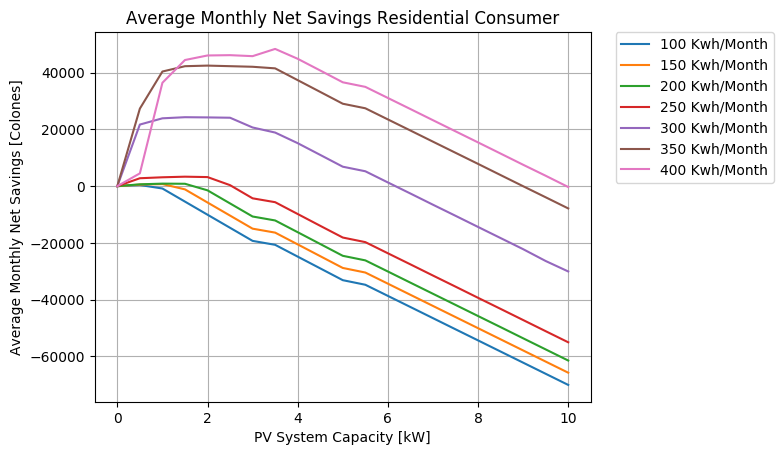

In [3]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("Average Monthly Net Savings [Colones]")
grid("on");
title("Average Monthly Net Savings Residential Consumer");

It is hard to tell here, but there is economic gains within the first 5 years for consumers starting un 300 kWh

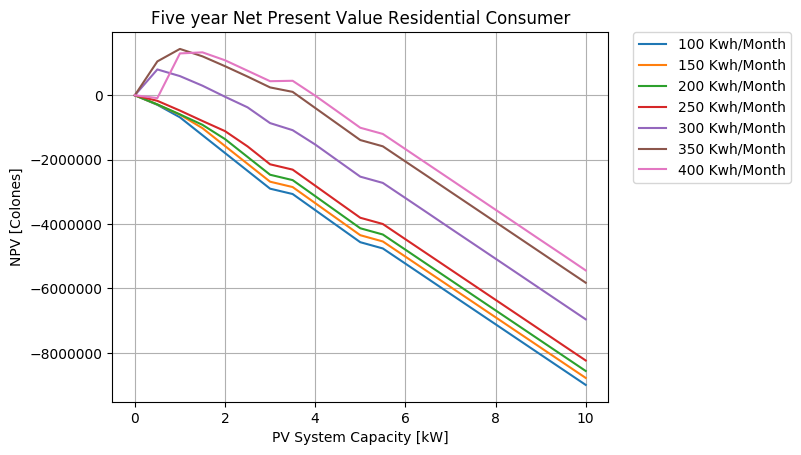

In [4]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),neg_pv[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Five year Net Present Value Residential Consumer");

In [5]:
consumption = 500:100:1500
capacity = 0.0:0.5:15

neg_pv = Array{Float64,2}(undef, length(consumption), length(capacity))
results = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
    for (jx, ca) in enumerate(capacity)
        PVRes.capacity = ca
        cashflow = PV_cashflow(cnfl_residential, PVRes, BAC1, tariff_increase = true)
        results[ix,jx] = mean(cashflow)  
        annuities = sum(cashflow,dims=1)
        neg_pv[ix,jx] = sum(annuities[1:5])     
    end
end

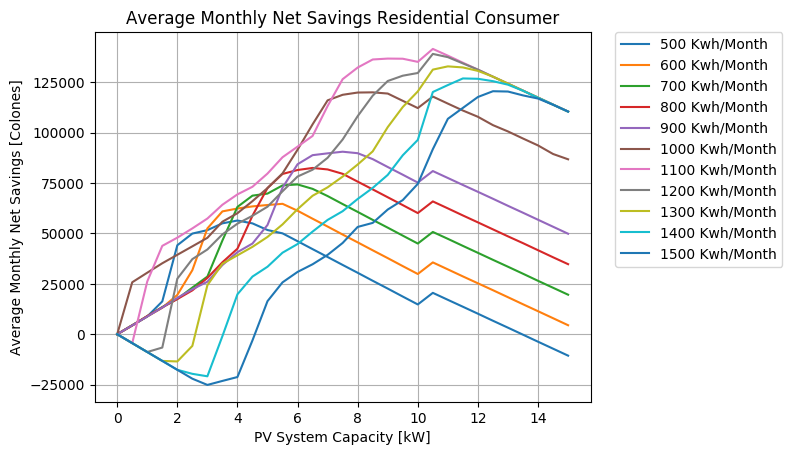

In [6]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("Average Monthly Net Savings [Colones]")
grid("on");
title("Average Monthly Net Savings Residential Consumer");

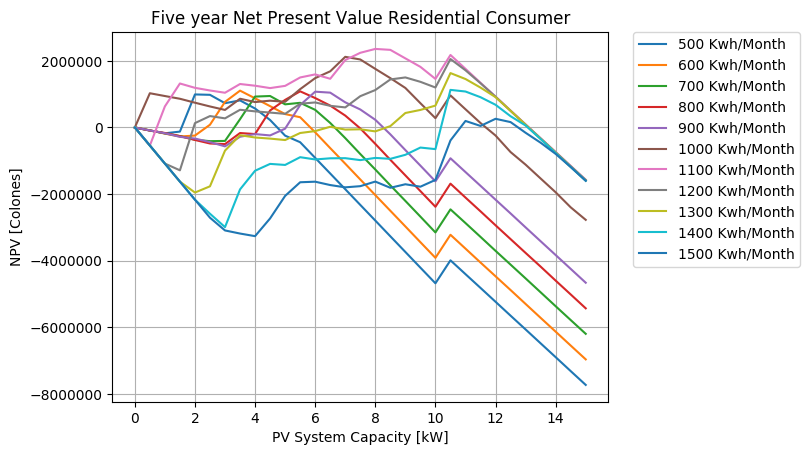

In [7]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),neg_pv[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Five year Net Present Value Residential Consumer");

In [8]:
consumption = 1500:500:6000
capacity = 0.0:0.5:40

results = Array{Float64,2}(undef, length(consumption), length(capacity))

neg_pv = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
    for (jx, ca) in enumerate(capacity)
        PVRes.capacity = ca
        cashflow = PV_cashflow(cnfl_residential, PVRes, BAC1, tariff_increase = true)
        results[ix,jx] = mean(cashflow)  
        annuities = sum(cashflow,dims=1)
        neg_pv[ix,jx] = sum(annuities[1:5])     
    end
end

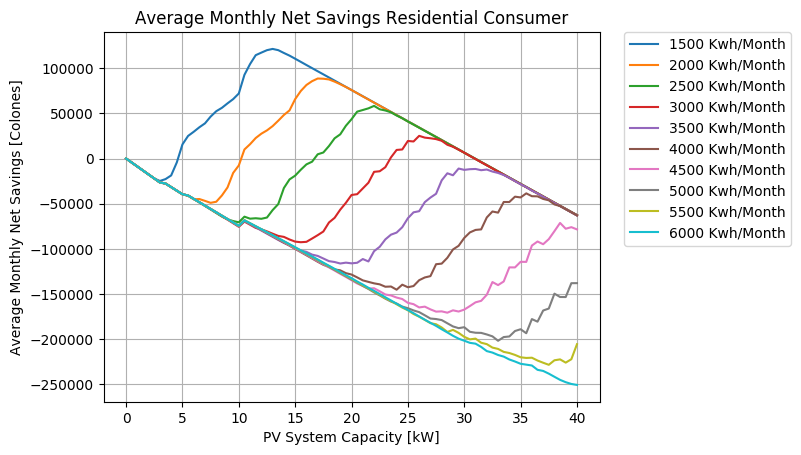

In [9]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("Average Monthly Net Savings [Colones]")
grid("on");
title("Average Monthly Net Savings Residential Consumer");

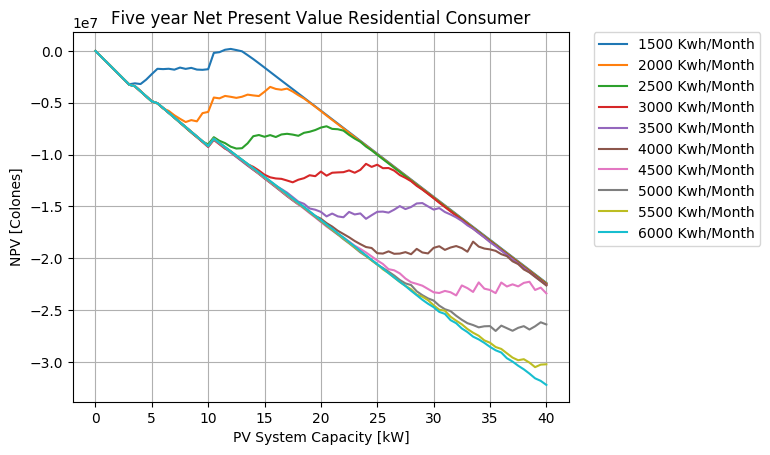

In [10]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),neg_pv[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Five year Net Present Value Residential Consumer");

# Commercial Industrial Cases
They include the downpayment in their estimation and discount at an internal rate of 6%. They also use an stable 600 colones/dolar exchange rate for the whole period of analysis. 

In [11]:
consumption = 500:500:3000
capacity = 0.0:1:60
pv = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    for (jx, ca) in enumerate(capacity)
    PVComInd.capacity = ca
    cashflow = PV_cashflow(cnfl_commercial, PVComInd, BAC1, tariff_increase = true)
       annuities = sum(cashflow,dims=1)
        pv[ix,jx] = npv(annuities, cnfl_commercial.rate_return)
    end
end

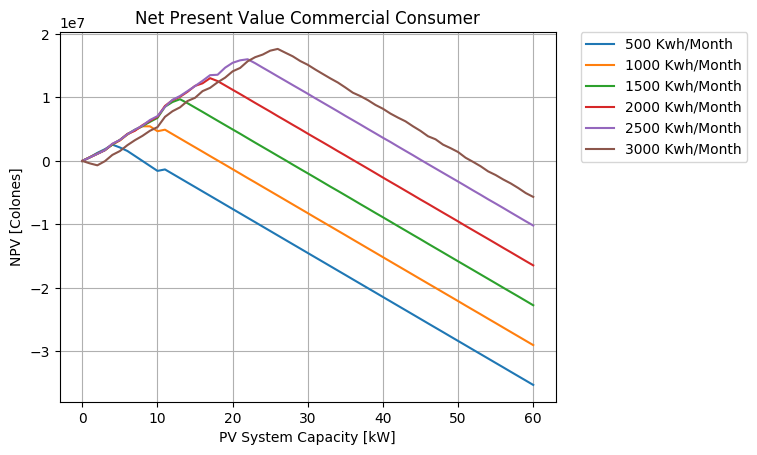

In [12]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),pv[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Net Present Value Commercial Consumer");

In [13]:
consumption = 2800:500:6000
capacity = 0:1:80

pv = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    for (jx, ca) in enumerate(capacity)
    PVComInd.capacity = ca
    cashflow = PV_cashflow(cnfl_commercial, PVComInd, BAC1, tariff_increase = true)
       annuities = sum(cashflow,dims=1)
        pv[ix,jx] = npv(annuities, cnfl_commercial.rate_return)
    end
end

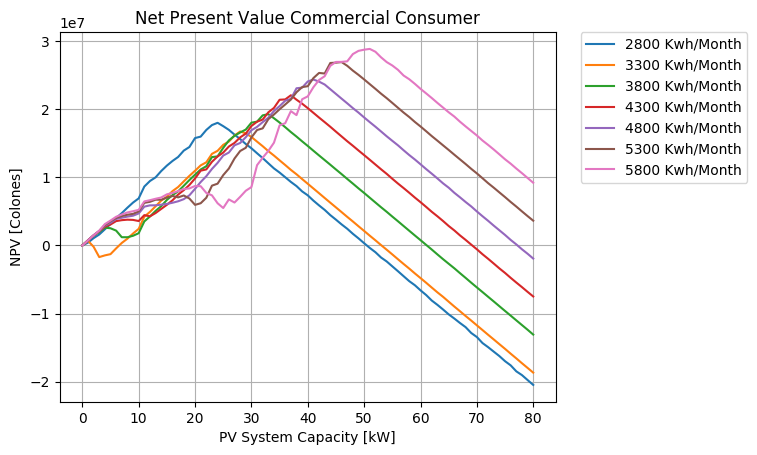

In [14]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),pv[ix,:], label = "$(co) Kwh/Month")
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Net Present Value Commercial Consumer");

In [15]:
consumption = 6000:500:11000
capacity = 0.0:5.0:220

pv = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    for (jx, ca) in enumerate(capacity)
    PVComInd.capacity = ca
    cashflow = PV_cashflow(cnfl_commercial, PVComInd, BAC1, tariff_increase = true)
       annuities = sum(cashflow,dims=1)
        pv[ix,jx] = npv(annuities, cnfl_commercial.rate_return)
    end
end

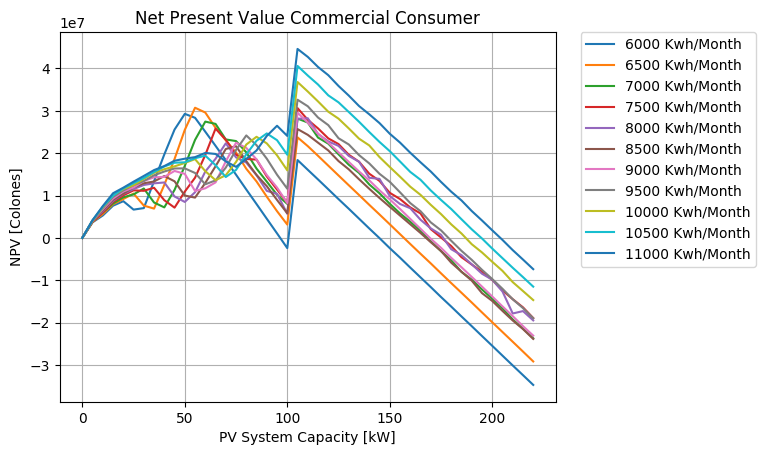

In [16]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),pv[ix,:], label = "$(co) Kwh/Month")
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Net Present Value Commercial Consumer");

Cases with consumption over 10,000 kWH are difficult to asses. According to the requirements, a user with over 10,000 kWH month on average should be moved to Medium Voltage Tariff. In this assessment we assume that the user will prefer the installation below 100 kW

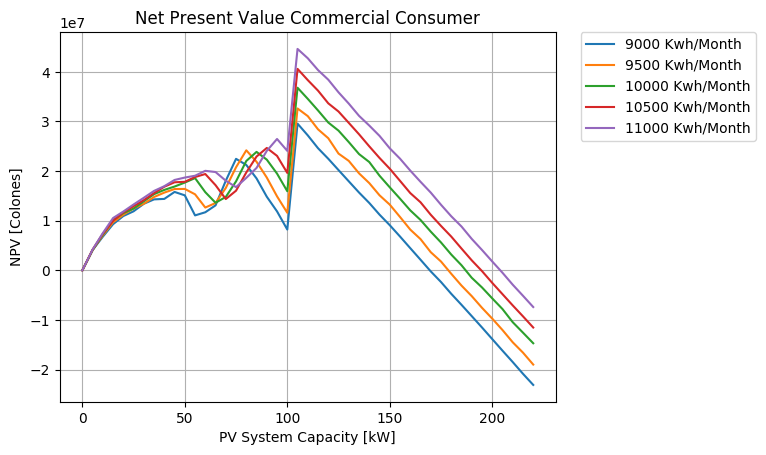

In [17]:
for (ix, co) in enumerate(consumption[7:end])
    plot(collect(capacity),pv[ix+6,:], label = "$(co) Kwh/Month")
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Net Present Value Commercial Consumer");

# Medium Voltage Cases
They include the downpayment in their estimation and discount at an internal rate of 6%. They also use an stable 600 colones/dolar exchange rate for the whole period of analysis. 

In [18]:
consumption = 10000:10000:100000
capacity = 0:10:1000

pv = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    cnfl_mediumvoltage.econsumption = co; get_pmax(cnfl_mediumvoltage);
    for (jx, ca) in enumerate(capacity)
        PVTMT.capacity = ca
        cashflow = PV_cashflow(cnfl_mediumvoltage, PVTMT, BAC1, tariff_increase = true)
        annuities = sum(cashflow,dims=1)
        pv[ix,jx] = npv(annuities, cnfl_mediumvoltage.rate_return)
    end
end

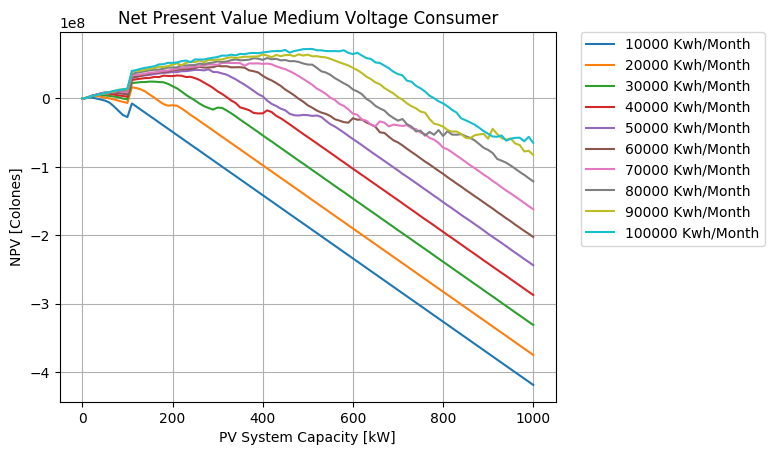

In [19]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),pv[ix,:], label = "$(co) Kwh/Month")
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Net Present Value Medium Voltage Consumer");